In [1]:
'''
Learning Jupyter Data Analysis

Page: https://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/
Videos: https://www.youtube.com/watch?list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ&v=_ZEWDGpM-vM
'''

'\nLearning Jupyter Data Analysis\n\nPage: https://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/\nVideos: https://www.youtube.com/watch?list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ&v=_ZEWDGpM-vM\n'

In [2]:
url = 'https://data.seattle.gov/api/views/aggm-esc4/rows.csv?accessType=DOWNLOAD'

In [3]:
from urllib.request import urlretrieve
# to tell the lib to put the figure inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

tmp = 'data.csv'
urlretrieve( url, tmp )

('data.csv', <http.client.HTTPMessage at 0x26e995ebdd8>)

In [4]:
data = pd.read_csv( tmp, index_col='Date', parse_dates=True )
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


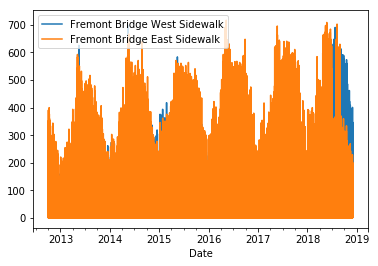

In [5]:
data.plot()

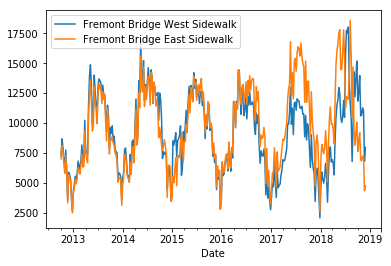

In [6]:
data.resample( 'W' ).sum().plot() # 'W' = weekly
# total number of rides each week

In [7]:
### applying new style to the plot

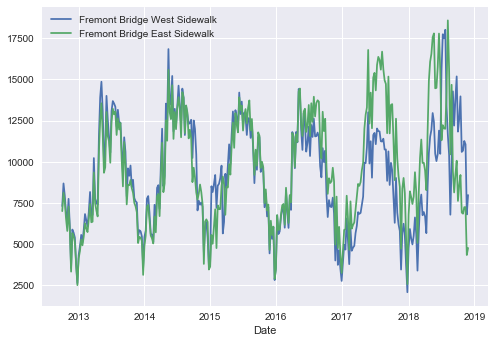

In [8]:
matplotlib.style.use( 'seaborn' )
data.resample( 'W' ).sum().plot() # 'W' = weekly

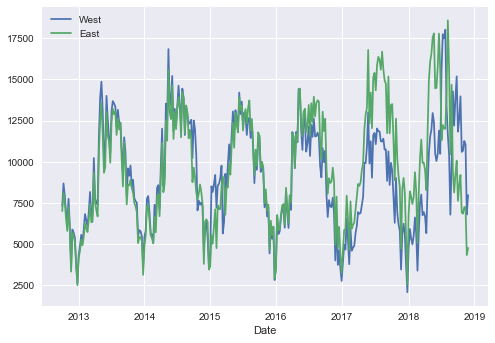

In [10]:
matplotlib.style.use( 'seaborn' )

### shorten the legend
data.columns = [ "West", "East" ]

data.resample( 'W' ).sum().plot() # 'W' = weekly

"\n'D' = daily\nrolling( <days> )\n"

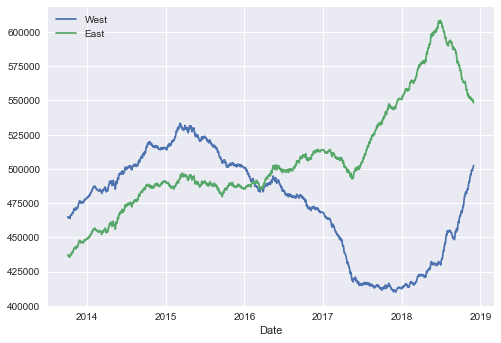

In [12]:
### if there is any sort of annual trend of the number of riders (annual growth)
data.resample( 'D' ).sum().rolling( 365 ).sum().plot()
'''
'D' = daily
rolling( <days> )

each of the points is the sum of the previous 365 days
'''

(0, 618365.35)

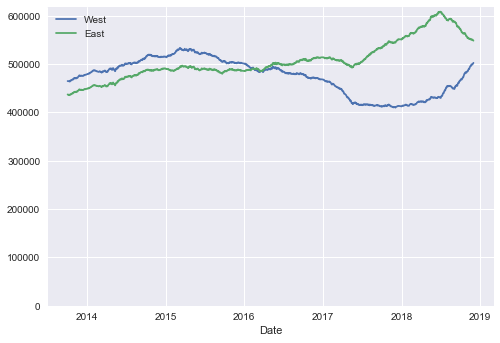

In [13]:
### modify the range of y axis
ax = data.resample( 'D' ).sum().rolling( 365 ).sum().plot()
ax.set_ylim( 0, None ) # use 'None' to use current max value

(0, 1082844.4)

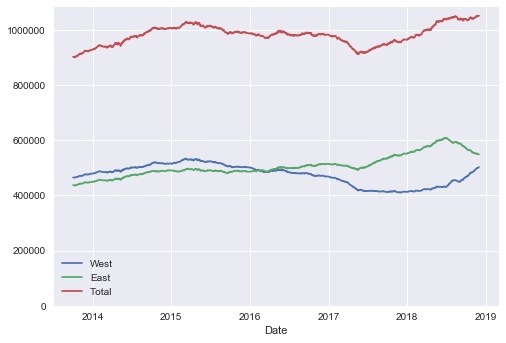

In [14]:
### add new column to the data
data[ 'Total' ] = data[ 'West' ] + data[ 'East' ]
ax = data.resample( 'D' ).sum().rolling( 365 ).sum().plot()
ax.set_ylim( 0, None ) # use 'None' to use current max value

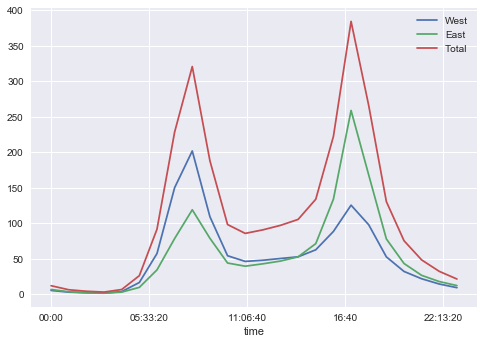

In [15]:
data.groupby( data.index.time ).mean().plot()
'''
1st peak in the morning
2nd peak in the afternoon
'''

In [16]:
### the see the whole dataset in the way of the previous section: use a pivot table
pivoted = data.pivot_table( 'Total', index=data.index.time, columns=data.index.date )
# look at the first 5-by-5 block
pivoted.iloc[ :5, :5 ]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


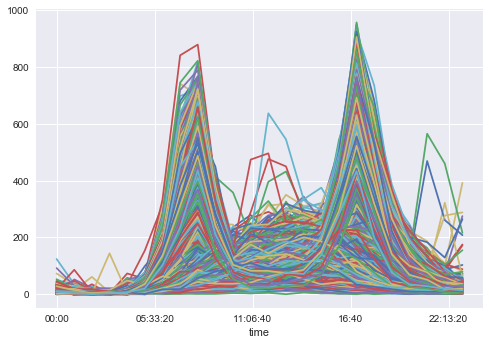

In [19]:
#pivoted.plot()
pivoted.plot( legend=False )

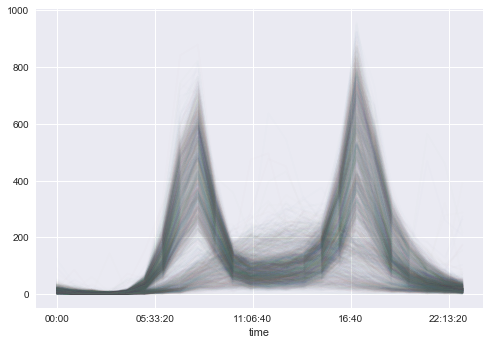

In [20]:
pivoted.plot( legend=False, alpha=0.01 )
# get the idea of trends and crossings